# 快慢指针——相遇追及问题

# 876. 链表的中间结点

给你单链表的头结点 head ，请你找出并返回链表的中间结点。

如果有两个中间结点，则返回第二个中间结点。

 

示例 1：

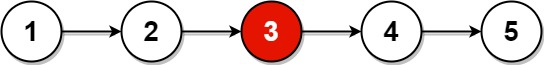

输入：head = [1,2,3,4,5]
输出：[3,4,5]
解释：链表只有一个中间结点，值为 3 。  
示例 2：

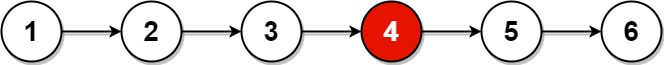

输入：head = [1,2,3,4,5,6]
输出：[4,5,6]
解释：该链表有两个中间结点，值分别为 3 和 4 ，返回第二个结点。
 

提示：

链表的结点数范围是 [1, 100]
1 <= Node.val <= 100

In [3]:
class Listnode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def list2listnode(vals):
    dummy = cur = Listnode(0)
    for val in vals:
        cur.next = Listnode(val)
        cur = cur.next 
    return dummy.next

def print_listnode(head):
    vals = []
    cur = head
    while cur:
        vals.append(cur.val) 
        cur = cur.next
    return vals

def f876(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    return slow

head = [1,2,3,4,5,6]
head = list2listnode(head)
print_listnode(f876(head))

[4, 5, 6]

# 141. 环形链表

给你一个链表的头节点 head ，判断链表中是否有环。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。注意：pos 不作为参数进行传递 。仅仅是为了标识链表的实际情况。

如果链表中存在环 ，则返回 true 。 否则，返回 false 。

 

示例 1：

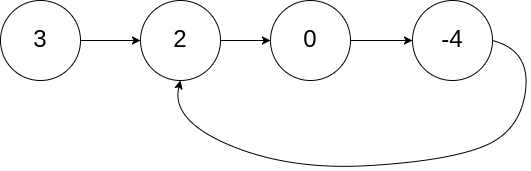

输入：head = [3,2,0,-4], pos = 1
输出：true
解释：链表中有一个环，其尾部连接到第二个节点。
示例 2：

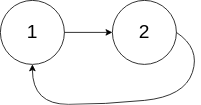

输入：head = [1,2], pos = 0
输出：true
解释：链表中有一个环，其尾部连接到第一个节点。
示例 3：

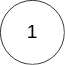

输入：head = [1], pos = -1
输出：false
解释：链表中没有环。
 

提示：

链表中节点的数目范围是 [0, 104]
-105 <= Node.val <= 105
pos 为 -1 或者链表中的一个 有效索引 。
 

进阶：你能用 O(1)（即，常量）内存解决此问题吗？

In [10]:
# 以下的类函数实现更加严谨，不进行值初始化
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def create_cyclic_linked_list(vals, pos):
    if not vals:
        return None
    dummy = cur = ListNode(0)
    nodes = [] # 用于保存所有节点，方便后续处理环
    for val in vals:
        node = ListNode(val)
        cur.next = node
        nodes.append(node)
        cur = cur.next
    if pos != -1:
        cur.next = nodes[pos]
    
    return dummy.next

def f141(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow is fast: return True
    return False

head = [3,2,0,-4]
pos = 1
head = create_cyclic_linked_list(head, pos)
print(f141(head))    

True


# 142. 环形链表 II

给定一个链表的头节点  head ，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。如果 pos 是 -1，则在该链表中没有环。注意：pos 不作为参数进行传递，仅仅是为了标识链表的实际情况。

不允许修改 链表。

 

示例 1：

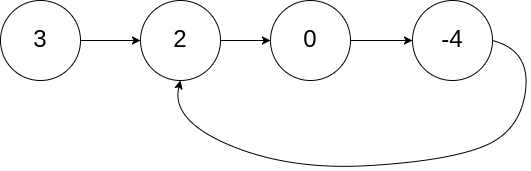

输入：head = [3,2,0,-4], pos = 1
输出：返回索引为 1 的链表节点
解释：链表中有一个环，其尾部连接到第二个节点。
示例 2：

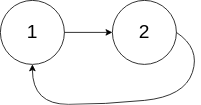

输入：head = [1,2], pos = 0
输出：返回索引为 0 的链表节点
解释：链表中有一个环，其尾部连接到第一个节点。
示例 3：

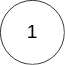

输入：head = [1], pos = -1
输出：返回 null
解释：链表中没有环。
 

提示：

链表中节点的数目范围在范围 [0, 104] 内
-105 <= Node.val <= 105
pos 的值为 -1 或者链表中的一个有效索引
 

进阶：你是否可以使用 O(1) 空间解决此题？

In [15]:
# 以下的类函数实现更加严谨，不进行值初始化
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def create_cyclic_linked_list(vals, pos):

    if not vals:return None
    dummy = cur = ListNode(0)
    nodes = [] # 用于保存所有节点，方便后续处理环
    for val in vals:
        node = ListNode(val)
        cur.next = node
        nodes.append(node)
        cur = cur.next
    if pos != -1:
        cur.next = nodes[pos]

    return dummy.next

def f142_1(head):
    slow = fast = pointer = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow is fast:
            while slow is not pointer:
                slow = slow.next
                pointer = pointer.next
            return slow
    return None

def f142_2(head):
    slow = fast = pointer = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow is fast:
            break
    while pointer != slow:
        pointer = pointer.next
        slow = slow.next
    return slow

head = [3,2,0,-4]
pos = 1
head = create_cyclic_linked_list(head, pos)
print(f142_1(head).val)            



2


# 143. 重排链表

给定一个单链表 L 的头节点 head ，单链表 L 表示为：

L0 → L1 → … → Ln - 1 → Ln
请将其重新排列后变为：

L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …
不能只是单纯的改变节点内部的值，而是需要实际的进行节点交换。

 

示例 1：

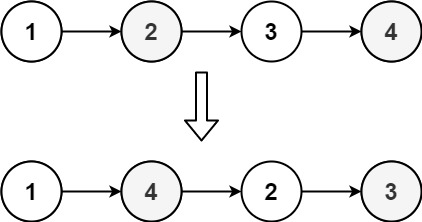

输入：head = [1,2,3,4]
输出：[1,4,2,3]  
示例 2：

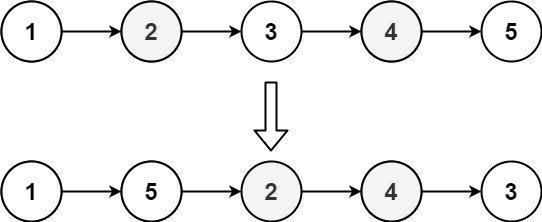

输入：head = [1,2,3,4,5]
输出：[1,5,2,4,3]
 

提示：

链表的长度范围为 [1, 5 * 104]
1 <= node.val <= 1000

In [36]:
class ListNode:
    def __init__(self, val=0, next = None):
        self.val = val
        self.next = next

def list2listnode(vals):
    dummy = cur = ListNode(0)
    for val in vals:
        cur.next = ListNode(val)
        cur = cur.next
    return dummy.next

def print_listnode(head):
    vals = []
    cur = head
    while cur:
        vals.append(cur.val) 
        cur = cur.next
    return vals

def mid_node(head):
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    return slow

def reverse(head):
    pre = None
    cur = head
    while cur:
        nxt = cur.next
        cur.next = pre
        pre, cur = cur, nxt
    return pre

def f143(head):
    mid = mid_node(head)
    head1, head2 = head, reverse(mid)
    while head2.next:
        nxt1 = head1.next
        nxt2 = head2.next

        head1.next = head2
        head2.next = nxt1

        head1 = nxt1
        head2 = nxt2
    return head




head = list2listnode([1,2,3,4])
print_listnode(f143(head))
    

[1, 4, 2, 3]